In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import cv2

from place_me import run_v2 as optimize

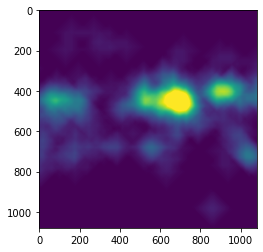

In [7]:
data = np.loadtxt('data/heatmap2.txt')
data[data > 2000] = 2000 
data = data / data.max()
data = data[:, 2160:3240]
# data = cv2.equalizeHist(data)
plt.imshow(data);
radius = 150

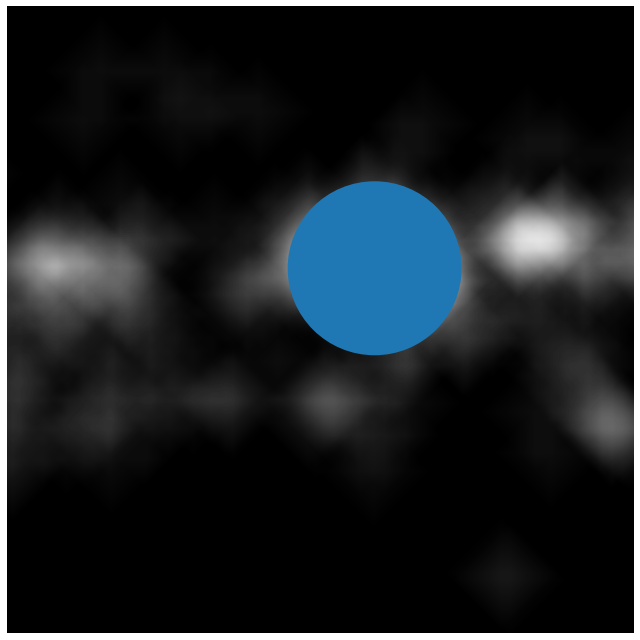

In [17]:
image_max = ndi.maximum_filter(data, size=20, mode='constant')

coordinates = peak_local_max(data, min_distance=100, num_peaks=1)

fig, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), radius)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()

In [18]:
def plot_from_optimal_coords(arr):
    [x1, y1, x2, y2] = arr
    fig, ax = plt.subplots(figsize=(10, 9))

    ax.imshow(data, cmap=plt.cm.gray)
    ax.autoscale(False)
    ax.plot(x1, y1, 'yx', markersize=25, markeredgewidth=3)
    ax.plot(x2, y2, 'rx', markersize=25, markeredgewidth=3)

    for y, x in coordinates:
        circ = Circle((x, y), radius)
        ax.add_patch(circ)

    fig.tight_layout()

    plt.show()

env: RUST_PRINT=0


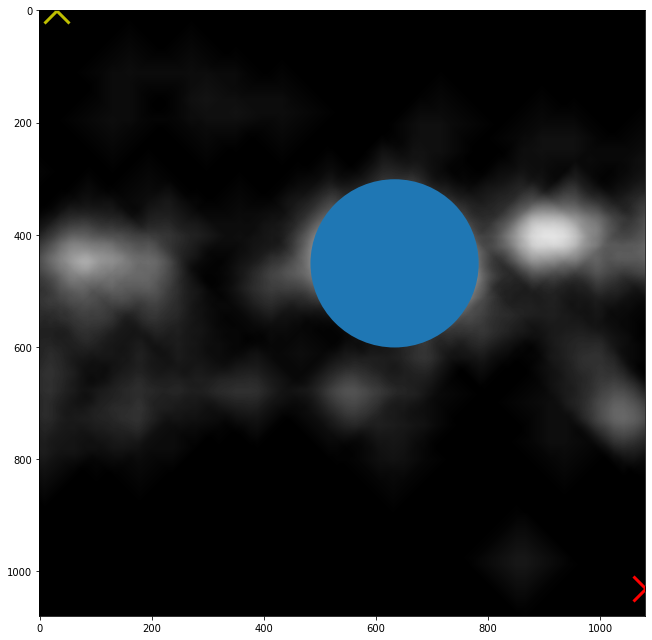

In [19]:
%env RUST_PRINT=0

arr = np.c_[coordinates, radius * np.ones(coordinates.shape[0])]
options = {
    'width': data.shape[1],
    'height': data.shape[0],
    'resolution': 2880,
    'pixel_step': 10,
}
res = optimize(*arr.T, **options)
plot_from_optimal_coords(res)
